In [ ]:
# !pip install vaderSentiment
# pip install seaborn

In [ ]:
# !pip install nltk
# nltk.download('punkt')

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import json

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Read xlsx file and place in dataframes

In [2]:
patients_df = pd.read_excel('data.xlsx', sheet_name='מטופלים')
feedbacks_df = pd.read_excel('data.xlsx', sheet_name='חוות דעת')
purchases_df = pd.read_excel('data.xlsx', sheet_name='רכישות')

In [3]:
patients_df

,Patient Code,Gender,City,Age,License quantity,Licensed Categories,Doctors name,Doc. Specialization,Spasific notes,Flowers/Oil 1,Cat 1,Quentity cat 1,Flowers/Oil 2,Cat 2,Quentity cat 2
0,4,Male,Nordia,35.421918,70,T20C4 + T1C20 + T1C28,Schiff Barkat,Pain,"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0
1,5,Female,Tel Aviv,29.460274,60,T20C4 + T3C15 + T1C28,Schiff Barkat,Pain,"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,T20C4,Lia Eshet Har Tov,Oncology,"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,T20C4 + T1C20,Oved Cohen,Surgery,"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,T20C4,Silvio Brill,Pain,"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,T1C28 + T20C4 + T3C15,Gilat Shenhav Zaltzman,Internal medicine,"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,T20C4,Livya Tamir,Orthopedic surgery,סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,T20C4,Livya Tamir,Orthopedic surgery,סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,T20C4,Roy Sheinfeld,Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,T20C4,YKR,General Medicine,סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
feedbacks_df

,מספר מטופל,תאריך,שם מוצר,דירוג השפעה כללית,דירוג ההקלה על הכאב,תופעות שחש בעת צריכת המוצר,הערות אישיות
0,4,2022-12-01,קייק מיקס,4,3,"מרגיע, מעייף","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
1,4,2022-06-13,לג'נדרי לארי,2,2,מעורר בלבול,"מזכיר את צונאמי, השפעה מאוזנת יחסית בטווח המיידי"
2,4,2022-06-21,אולטרהדאוג,2,1,NaN,NaN
3,5,2022-06-06,פרויד,5,5,"משרה תחושת אופוריה, מעורר יצירתיות, מרומם רוח,...",זן מעולה לשימוש בכל שעות היום. נעים ומרגיע
4,5,2022-10-10,ספאייר OG,5,5,"מרומם רוח, מרגיע,מעורר יצירתיות",השפעה מאוזנת ומעולה בשילוב עם CBD
5,5,2022-11-28,פרויד,3,3,"מעורר בלבול, מעורר חרדה","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
6,5,2023-01-30,ספאייר OG,3,2,NaN,לא ממש השפיע. צרכתי אותו בשילוב עם תפרחת CBD ו...
7,15,2022-03-04,בלאק,5,5,"מרגיע, מעייף","משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את הג..."
8,20,2022-02-15,וודינג קראשר,5,5,"מרגיע, מעורר תחושת אופוריה, מרומם רוח",NaN
9,20,2022-06-03,הד בנד,5,5,מעורר תחושת אופוריה,"ריח וטעם מעולים, קצת לימוני, קצת טחוב. השפעה חזקה"


In [5]:
purchases_df

,Patient Code,Order Date,Quantity In Order,Product Name
0,5,02.06.22,20,Froid (Indoor)
1,5,19.06.22,20,Vespera
2,5,06.07.22,10,Vespera
3,5,06.07.22,10,Vespera
4,5,06.07.22,10,Sapphire OG
...,...,...,...,...
64,79,13.07.22,20,Light Blue
65,79,14.08.22,20,Light Blue
66,79,14.08.22,10,Shvil Hazreicha
67,79,11.09.22,20,Light Blue


# Fix Cloumn names in dataframes

### Fix column names for patients_df

In [6]:
patients_df.columns = [col.lower().replace(' ', '_') for col in patients_df.columns]

In [7]:
patients_df

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2
0,4,Male,Nordia,35.421918,70,T20C4 + T1C20 + T1C28,Schiff Barkat,Pain,"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0
1,5,Female,Tel Aviv,29.460274,60,T20C4 + T3C15 + T1C28,Schiff Barkat,Pain,"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,T20C4,Lia Eshet Har Tov,Oncology,"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,T20C4 + T1C20,Oved Cohen,Surgery,"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,T20C4,Silvio Brill,Pain,"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,T1C28 + T20C4 + T3C15,Gilat Shenhav Zaltzman,Internal medicine,"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,T20C4,Livya Tamir,Orthopedic surgery,סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,T20C4,Livya Tamir,Orthopedic surgery,סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,T20C4,Roy Sheinfeld,Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,T20C4,YKR,General Medicine,סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN


### Fix column names for feedbacks_df

In [8]:
translation_dict = {
    'מספר מטופל': 'patient_code',
    'תאריך': 'date',
    'שם מוצר': 'product_name',
    'דירוג השפעה כללית': 'overall_impact_rating',
    'דירוג ההקלה על הכאב': 'pain_relief_rating',
    'תופעות שחש בעת צריכת המוצר': 'effects_felt_when_consuming_the_product',
    'הערות אישיות': 'personal_notes'
}
feedbacks_df.columns = [translation_dict.get(col, col.lower().replace(' ', '_')) for col in feedbacks_df.columns]

In [9]:
feedbacks_df

,patient_code,date,product_name,overall_impact_rating,pain_relief_rating,effects_felt_when_consuming_the_product,personal_notes
0,4,2022-12-01,קייק מיקס,4,3,"מרגיע, מעייף","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
1,4,2022-06-13,לג'נדרי לארי,2,2,מעורר בלבול,"מזכיר את צונאמי, השפעה מאוזנת יחסית בטווח המיידי"
2,4,2022-06-21,אולטרהדאוג,2,1,NaN,NaN
3,5,2022-06-06,פרויד,5,5,"משרה תחושת אופוריה, מעורר יצירתיות, מרומם רוח,...",זן מעולה לשימוש בכל שעות היום. נעים ומרגיע
4,5,2022-10-10,ספאייר OG,5,5,"מרומם רוח, מרגיע,מעורר יצירתיות",השפעה מאוזנת ומעולה בשילוב עם CBD
5,5,2022-11-28,פרויד,3,3,"מעורר בלבול, מעורר חרדה","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
6,5,2023-01-30,ספאייר OG,3,2,NaN,לא ממש השפיע. צרכתי אותו בשילוב עם תפרחת CBD ו...
7,15,2022-03-04,בלאק,5,5,"מרגיע, מעייף","משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את הג..."
8,20,2022-02-15,וודינג קראשר,5,5,"מרגיע, מעורר תחושת אופוריה, מרומם רוח",NaN
9,20,2022-06-03,הד בנד,5,5,מעורר תחושת אופוריה,"ריח וטעם מעולים, קצת לימוני, קצת טחוב. השפעה חזקה"


### Fix column names for purchases_df

In [10]:
purchases_df.columns = [col.lower().replace(' ', '_') for col in purchases_df.columns]

In [11]:
purchases_df

,patient_code,order_date,quantity_in_order,product_name
0,5,02.06.22,20,Froid (Indoor)
1,5,19.06.22,20,Vespera
2,5,06.07.22,10,Vespera
3,5,06.07.22,10,Vespera
4,5,06.07.22,10,Sapphire OG
...,...,...,...,...
64,79,13.07.22,20,Light Blue
65,79,14.08.22,20,Light Blue
66,79,14.08.22,10,Shvil Hazreicha
67,79,11.09.22,20,Light Blue


### Display the updated column names and types for each dataframe

In [12]:
print("Patients DataFrame Columns and Types:")
print(patients_df.dtypes)

print("\nFeedbacks DataFrame Columns and Types:")
print(feedbacks_df.dtypes)

print("\nPurchases DataFrame Columns and Types:")
print(purchases_df.dtypes)

Patients DataFrame Columns and Types:
patient_code             int64
gender                  object
city                    object
age                    float64
license_quantity         int64
licensed_categories     object
doctors_name            object
doc._specialization     object
spasific_notes          object
flowers/oil_1           object
cat_1                   object
quentity_cat_1         float64
flowers/oil_2           object
cat_2                   object
quentity_cat_2         float64
dtype: object

Feedbacks DataFrame Columns and Types:
patient_code                                        int64
date                                       datetime64[ns]
product_name                                       object
overall_impact_rating                               int64
pain_relief_rating                                  int64
effects_felt_when_consuming_the_product            object
personal_notes                                     object
dtype: object

Purchases DataFrame Co

# Fix/ clean data in dataframes

### Fix Patients DataFrame

In [13]:
patients_df

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2
0,4,Male,Nordia,35.421918,70,T20C4 + T1C20 + T1C28,Schiff Barkat,Pain,"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0
1,5,Female,Tel Aviv,29.460274,60,T20C4 + T3C15 + T1C28,Schiff Barkat,Pain,"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,T20C4,Lia Eshet Har Tov,Oncology,"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,T20C4 + T1C20,Oved Cohen,Surgery,"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,T20C4,Silvio Brill,Pain,"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,T1C28 + T20C4 + T3C15,Gilat Shenhav Zaltzman,Internal medicine,"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,T20C4,Livya Tamir,Orthopedic surgery,סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,T20C4,Livya Tamir,Orthopedic surgery,סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,T20C4,Roy Sheinfeld,Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,T20C4,YKR,General Medicine,סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Adjust 'licensed_categories' to list with '+' as delimiter
patients_df['licensed_categories'] = patients_df['licensed_categories'].str.replace(' ', '').str.split('+')

# Transform 'doc._specialization' to list with ',' as delimiter
patients_df['doc._specialization'] = patients_df['doc._specialization'].apply(lambda x: [x] if ',' not in str(x) else str(x).split(','))

# # Adjust 'flowers/oil_1' and 'flowers/oil_2' to 'flowers' or 'oil'
# patients_df['flowers/oil_1'] = patients_df['flowers/oil_1'].apply(lambda x: 'flowers' if 'flowers' in str(x).lower() else 'oil')
# patients_df['flowers/oil_2'] = patients_df['flowers/oil_2'].apply(lambda x: 'flowers' if 'flowers' in str(x).lower() else 'oil')

# # Convert 'cat_1' and 'cat_2' to string
# patients_df['cat_1'] = patients_df['cat_1'].astype(str)
# patients_df['cat_2'] = patients_df['cat_2'].astype(str)


# exploded_by_license =  patients_df.explode('licensed_categories')
# exploded_by_license

In [15]:
patients_df

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2
0,4,Male,Nordia,35.421918,70,"[T20C4, T1C20, T1C28]",Schiff Barkat,[Pain],"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0
1,5,Female,Tel Aviv,29.460274,60,"[T20C4, T3C15, T1C28]",Schiff Barkat,[Pain],"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,[T20C4],Lia Eshet Har Tov,[Oncology],"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,"[T20C4, T1C20]",Oved Cohen,[Surgery],"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,[T20C4],Silvio Brill,[Pain],"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,"[T1C28, T20C4, T3C15]",Gilat Shenhav Zaltzman,[Internal medicine],"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,[T20C4],Roy Sheinfeld,[Pain],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,[T20C4],YKR,[General Medicine],סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN


### Fix Feedbacks DataFrame

In [16]:
# Adjust 'effects_felt_when_consuming_the_product' to list with comma (',') delimiter after removing spaces after commas
feedbacks_df['effects_felt_when_consuming_the_product'] = (feedbacks_df['effects_felt_when_consuming_the_product']
                                                           .str.replace(', ', ',')
                                                           .str.split(','))

In [17]:
feedbacks_df

,patient_code,date,product_name,overall_impact_rating,pain_relief_rating,effects_felt_when_consuming_the_product,personal_notes
0,4,2022-12-01,קייק מיקס,4,3,"[מרגיע, מעייף]","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
1,4,2022-06-13,לג'נדרי לארי,2,2,[מעורר בלבול],"מזכיר את צונאמי, השפעה מאוזנת יחסית בטווח המיידי"
2,4,2022-06-21,אולטרהדאוג,2,1,NaN,NaN
3,5,2022-06-06,פרויד,5,5,"[משרה תחושת אופוריה, מעורר יצירתיות, מרומם רוח...",זן מעולה לשימוש בכל שעות היום. נעים ומרגיע
4,5,2022-10-10,ספאייר OG,5,5,"[מרומם רוח, מרגיע, מעורר יצירתיות]",השפעה מאוזנת ומעולה בשילוב עם CBD
5,5,2022-11-28,פרויד,3,3,"[מעורר בלבול, מעורר חרדה]","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
6,5,2023-01-30,ספאייר OG,3,2,NaN,לא ממש השפיע. צרכתי אותו בשילוב עם תפרחת CBD ו...
7,15,2022-03-04,בלאק,5,5,"[מרגיע, מעייף]","משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את הג..."
8,20,2022-02-15,וודינג קראשר,5,5,"[מרגיע, מעורר תחושת אופוריה, מרומם רוח]",NaN
9,20,2022-06-03,הד בנד,5,5,[מעורר תחושת אופוריה],"ריח וטעם מעולים, קצת לימוני, קצת טחוב. השפעה חזקה"


In [18]:
feedbacks_df.dtypes

patient_code                                        int64
date                                       datetime64[ns]
product_name                                       object
overall_impact_rating                               int64
pain_relief_rating                                  int64
effects_felt_when_consuming_the_product            object
personal_notes                                     object
dtype: object

### Fix Purchases DataFrame

In [19]:
# Convert 'order_date' to DateTime type
purchases_df['order_date'] = pd.to_datetime(purchases_df['order_date'], errors='coerce')

In [20]:
purchases_df

,patient_code,order_date,quantity_in_order,product_name
0,5,2022-02-06,20,Froid (Indoor)
1,5,2022-06-19,20,Vespera
2,5,2022-06-07,10,Vespera
3,5,2022-06-07,10,Vespera
4,5,2022-06-07,10,Sapphire OG
...,...,...,...,...
64,79,2022-07-13,20,Light Blue
65,79,2022-08-14,20,Light Blue
66,79,2022-08-14,10,Shvil Hazreicha
67,79,2022-11-09,20,Light Blue


In [21]:
purchases_df.dtypes

patient_code                  int64
order_date           datetime64[ns]
quantity_in_order             int64
product_name                 object
dtype: object

# Data Analysis

### Grouping 'feedbacks_df' by 'product_name' and aggregating columns into lists

In [22]:
feedbacks_df

,patient_code,date,product_name,overall_impact_rating,pain_relief_rating,effects_felt_when_consuming_the_product,personal_notes
0,4,2022-12-01,קייק מיקס,4,3,"[מרגיע, מעייף]","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
1,4,2022-06-13,לג'נדרי לארי,2,2,[מעורר בלבול],"מזכיר את צונאמי, השפעה מאוזנת יחסית בטווח המיידי"
2,4,2022-06-21,אולטרהדאוג,2,1,NaN,NaN
3,5,2022-06-06,פרויד,5,5,"[משרה תחושת אופוריה, מעורר יצירתיות, מרומם רוח...",זן מעולה לשימוש בכל שעות היום. נעים ומרגיע
4,5,2022-10-10,ספאייר OG,5,5,"[מרומם רוח, מרגיע, מעורר יצירתיות]",השפעה מאוזנת ומעולה בשילוב עם CBD
5,5,2022-11-28,פרויד,3,3,"[מעורר בלבול, מעורר חרדה]","על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש..."
6,5,2023-01-30,ספאייר OG,3,2,NaN,לא ממש השפיע. צרכתי אותו בשילוב עם תפרחת CBD ו...
7,15,2022-03-04,בלאק,5,5,"[מרגיע, מעייף]","משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את הג..."
8,20,2022-02-15,וודינג קראשר,5,5,"[מרגיע, מעורר תחושת אופוריה, מרומם רוח]",NaN
9,20,2022-06-03,הד בנד,5,5,[מעורר תחושת אופוריה],"ריח וטעם מעולים, קצת לימוני, קצת טחוב. השפעה חזקה"


In [108]:
import re

positive_patterns_list = ['מצוין','נהדר','השפעה מאוזנת','מוצר טוב','השפעה חזקה','עוזר לכאב','משפר כאב','מרגיע כאב','הרגיע'
'השפעה מאוזנת','מעולה','לא שובר','מרגיע את הגוף','עוזר לכאב','משפר כאב','מאזן','מרגיע חרדות','אופוריה','יצירתיות','מרומם רוח',
'התרוממות רוח' ,'שיפור במצב רוח', 'הכניס אותי לפוקוס','המוצר עזר'
                         ]

neutral_patterns_list = ['מוצר בסדר','לא רע','השפעה בינונית','לא תרם במיוחד','השפעה חלקית','שיפר חלקי','מוצר סביר','עוזר לפעמים',
'לא תמיד עוזר','ניטרלי','לא מקפיץ את הדופק',' לא ממש השפיע','השפעה נחמדה'
                        ]

negative_patterns_list = ['לא הרגיע','לא עזר','חלש מדי','השפעה פחותה','נורא','גורם לבחילות','מעורר בלבול','מעורר חרדה','מעייף',
'גרם לכאב ראש','לא טוב','חזק מדי','השפעה חזקה מדי','מדכא','גרוע','משפיע עלי באופן לא רצוי',' ממש לא הרגשתי','משפיע באופן לא רצוי',
'מעלה בחילות','לא ממש עוזר','לא ממש עזר'
                         ]

# Combine all lists into a single dictionary
sentiment_dict = {}
for phrase in positive_patterns_list:
    sentiment_dict[phrase] = 'positive'

for phrase in neutral_patterns_list:
    sentiment_dict[phrase] = 'neutral'

for phrase in negative_patterns_list:
    sentiment_dict[phrase] = 'negative'

# Initialize sentiment_df DataFrame with 'personal_notes' column
sentiment_df = pd.DataFrame()
sentiment_df['personal_notes'] = feedbacks_df['personal_notes']

# # Function to categorize sentiment and match patterns based on the sentiment_dict
# def categorize_sentiment_and_match_patterns(text, sentiment_dict):
#     if isinstance(text, str):
#         matched_positive = []
#         matched_neutral = []
#         matched_negative = []

#         for phrase, sent in sentiment_dict.items():
#             # Match the phrase ignoring negation terms
#             if re.search(fr'(?!לא\s){phrase}', text):
#                 if sent == 'positive':
#                     matched_positive.append(phrase)
#                 elif sent == 'neutral':
#                     matched_neutral.append(phrase)
#                 elif sent == 'negative':
#                     matched_negative.append(phrase)

#         return matched_positive if matched_positive else None, matched_neutral if matched_neutral else None, matched_negative if matched_negative else None
#     else:
#         return None, None, None

# # Apply the function to the dataframe
# sentiment_df['positive_patterns'], sentiment_df['neutral_patterns'], sentiment_df['negative_patterns'] = zip(*sentiment_df['personal_notes'].apply(
#     lambda text: categorize_sentiment_and_match_patterns(text, sentiment_dict)))


# Function to categorize sentiment and match patterns based on the sentiment_dict
def categorize_sentiment_and_match_patterns(text, sentiment_dict):
    matched_positive = []
    matched_neutral = []
    matched_negative = []

    for phrase, sent in sentiment_dict.items():
        if phrase in str(text):
            if sent == 'positive':
                matched_positive.append(phrase)
            elif sent == 'neutral':
                matched_neutral.append(phrase)
            elif sent == 'negative':
                matched_negative.append(phrase)

    return matched_positive if matched_positive else None, matched_neutral if matched_neutral else None, matched_negative if matched_negative else None

# Apply categorization and pattern matching to create columns for each sentiment category
sentiment_df['positive_patterns'], sentiment_df['neutral_patterns'], sentiment_df['negative_patterns'] = zip(*sentiment_df['personal_notes'].apply(
    lambda text: categorize_sentiment_and_match_patterns(text, sentiment_dict)))

sentiment_df

,personal_notes,positive_patterns,neutral_patterns,negative_patterns
0,"על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש...",None,None,[משפיע עלי באופן לא רצוי]
1,"מזכיר את צונאמי, השפעה מאוזנת יחסית בטווח המיידי",[השפעה מאוזנת],None,None
2,NaN,None,None,None
3,זן מעולה לשימוש בכל שעות היום. נעים ומרגיע,[מעולה],None,None
4,השפעה מאוזנת ומעולה בשילוב עם CBD,"[השפעה מאוזנת, מעולה]",None,None
5,"על אף שהשתמשתי במוצר לאורך זמן, השפעתו עליי הש...",None,None,[משפיע עלי באופן לא רצוי]
6,לא ממש השפיע. צרכתי אותו בשילוב עם תפרחת CBD ו...,None,None,None
7,"משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את הג...","[לא שובר, מרגיע את הגוף]",None,None
8,NaN,None,None,None
9,"ריח וטעם מעולים, קצת לימוני, קצת טחוב. השפעה חזקה",[השפעה חזקה],None,None


In [84]:
# new_df.to_csv('sentiment_data.csv')

In [23]:
feedbacks_grouped_by_product_df = (feedbacks_df.groupby('product_name').agg(lambda x: x.tolist()).reset_index())  # Resetting index to make 'product_name' a column again

count_patient_codes_vectorized = np.vectorize(lambda x: len(x))
feedbacks_grouped_by_product_df['product_patients_count'] = count_patient_codes_vectorized(feedbacks_grouped_by_product_df['patient_code'])

feedbacks_grouped_by_product_df

,product_name,patient_code,date,overall_impact_rating,pain_relief_rating,effects_felt_when_consuming_the_product,personal_notes,product_patients_count
0,DQ T15,[214],[2022-08-16 00:00:00],[5],[5],"[[מרגיע, מרומם רוח]]","[השפעה היברידית, מרגיע חרדות. הוא לא חזק ביותר...",1
1,PK,[55],[2022-07-12 00:00:00],[2],[2],[[מעורר בלבול]],[לא ממש עוזר לכאב],1
2,אולטרהדאוג,[4],[2022-06-21 00:00:00],[2],[1],[nan],[nan],1
3,אוסקר,[39],[2022-07-03 00:00:00],[4],[4],[[מעורר]],"[מאזן ולא מקפיץ את הדופק, קצת מעלה בחילות]",1
4,אור,"[21, 21]","[2022-05-24 00:00:00, 2023-12-02 00:00:00]","[5, 3]","[5, 3]","[[מרגיע], nan]","[nan, השפעה פחותה לעומת ההשפעה בעבר]",2
5,אלגרו,[20],[2022-11-04 00:00:00],[3],[2],[nan],"[השפעה נחמדה, לא הייתה משמעותית מאוד]",1
6,אמנזיה,[218],[2022-07-17 00:00:00],[5],[4],"[[משרה תחושת אופוריה, מעורר יצירתיות, מעורר]]",[nan],1
7,ביבה,[44],[2022-12-29 00:00:00],[5],[5],"[[מרדים, מרגיע, מעורר תאבון, מרפה שרירים]]",[nan],1
8,בין ערביים,[20],[2022-05-25 00:00:00],[4],[4],"[[מרומם רוח, משרה תחושת אופוריה]]","[על אף שהגנטיקה של המוצר ושל פרויד זהות, המוצר...",1
9,בלאק,[15],[2022-03-04 00:00:00],[5],[5],"[[מרגיע, מעייף]]","[משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את ה...",1


In [24]:
feedbacks_grouped_by_product_df

,product_name,patient_code,date,overall_impact_rating,pain_relief_rating,effects_felt_when_consuming_the_product,personal_notes,product_patients_count
0,DQ T15,[214],[2022-08-16 00:00:00],[5],[5],"[[מרגיע, מרומם רוח]]","[השפעה היברידית, מרגיע חרדות. הוא לא חזק ביותר...",1
1,PK,[55],[2022-07-12 00:00:00],[2],[2],[[מעורר בלבול]],[לא ממש עוזר לכאב],1
2,אולטרהדאוג,[4],[2022-06-21 00:00:00],[2],[1],[nan],[nan],1
3,אוסקר,[39],[2022-07-03 00:00:00],[4],[4],[[מעורר]],"[מאזן ולא מקפיץ את הדופק, קצת מעלה בחילות]",1
4,אור,"[21, 21]","[2022-05-24 00:00:00, 2023-12-02 00:00:00]","[5, 3]","[5, 3]","[[מרגיע], nan]","[nan, השפעה פחותה לעומת ההשפעה בעבר]",2
5,אלגרו,[20],[2022-11-04 00:00:00],[3],[2],[nan],"[השפעה נחמדה, לא הייתה משמעותית מאוד]",1
6,אמנזיה,[218],[2022-07-17 00:00:00],[5],[4],"[[משרה תחושת אופוריה, מעורר יצירתיות, מעורר]]",[nan],1
7,ביבה,[44],[2022-12-29 00:00:00],[5],[5],"[[מרדים, מרגיע, מעורר תאבון, מרפה שרירים]]",[nan],1
8,בין ערביים,[20],[2022-05-25 00:00:00],[4],[4],"[[מרומם רוח, משרה תחושת אופוריה]]","[על אף שהגנטיקה של המוצר ושל פרויד זהות, המוצר...",1
9,בלאק,[15],[2022-03-04 00:00:00],[5],[5],"[[מרגיע, מעייף]]","[משתמשת בו בעיקר בלילות, מרגישה שזה מרגיע את ה...",1


In [76]:
feedbacks_grouped_by_product_df['personal_notes'].iloc[15][1]

nan

In [78]:
# Create a function to handle NaN and flatten the list
def process_personal_notes(notes):
    if pd.isnull(notes):  # Check for NaN values
        return ''
    else:
        return ', '.join(filter(None, notes))  # Flatten the list and remove empty strings

# Apply the processing function to the 'personal_notes' column
feedbacks_grouped_by_product_df['processed_notes'] = feedbacks_grouped_by_product_df['personal_notes'].apply(process_personal_notes)

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply VADER sentiment analysis to the 'processed_notes' column
feedbacks_grouped_by_product_df['sentiment_scores'] = feedbacks_grouped_by_product_df['processed_notes'].apply(get_sentiment_scores)

# Extract individual sentiment scores (positive, negative, neutral, compound) into separate columns
feedbacks_grouped_by_product_df[['positive', 'negative', 'neutral', 'compound']] = feedbacks_grouped_by_product_df['sentiment_scores'].apply(pd.Series)

# Display the updated DataFrame with sentiment scores
feedbacks_grouped_by_product_df[['product_name', 'processed_notes', 'positive', 'negative', 'neutral', 'compound']]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
feedbacks_grouped_by_product_df.to_csv('feedbacks_grouped_by_product.csv')

In [25]:
effects_df = feedbacks_grouped_by_product_df[['product_name','effects_felt_when_consuming_the_product']]
effects_df

,product_name,effects_felt_when_consuming_the_product
0,DQ T15,"[[מרגיע, מרומם רוח]]"
1,PK,[[מעורר בלבול]]
2,אולטרהדאוג,[nan]
3,אוסקר,[[מעורר]]
4,אור,"[[מרגיע], nan]"
5,אלגרו,[nan]
6,אמנזיה,"[[משרה תחושת אופוריה, מעורר יצירתיות, מעורר]]"
7,ביבה,"[[מרדים, מרגיע, מעורר תאבון, מרפה שרירים]]"
8,בין ערביים,"[[מרומם רוח, משרה תחושת אופוריה]]"
9,בלאק,"[[מרגיע, מעייף]]"


In [26]:
effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].astype(str)

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/2319993500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].astype(str)


In [27]:
effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].str.replace(r"[\[\]']", '', regex=True)
effects_df

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/2140851163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].str.replace(r"[\[\]']", '', regex=True)


,product_name,effects_felt_when_consuming_the_product
0,DQ T15,"מרגיע, מרומם רוח"
1,PK,מעורר בלבול
2,אולטרהדאוג,nan
3,אוסקר,מעורר
4,אור,"מרגיע, nan"
5,אלגרו,nan
6,אמנזיה,"משרה תחושת אופוריה, מעורר יצירתיות, מעורר"
7,ביבה,"מרדים, מרגיע, מעורר תאבון, מרפה שרירים"
8,בין ערביים,"מרומם רוח, משרה תחושת אופוריה"
9,בלאק,"מרגיע, מעייף"


In [28]:
effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
effects_df

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/481215046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effects_df['effects_felt_when_consuming_the_product'] = effects_df['effects_felt_when_consuming_the_product'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


,product_name,effects_felt_when_consuming_the_product
0,DQ T15,"[מרגיע, מרומם רוח]"
1,PK,[מעורר בלבול]
2,אולטרהדאוג,[nan]
3,אוסקר,[מעורר]
4,אור,"[מרגיע, nan]"
5,אלגרו,[nan]
6,אמנזיה,"[משרה תחושת אופוריה, מעורר יצירתיות, מעורר]"
7,ביבה,"[מרדים, מרגיע, מעורר תאבון, מרפה שרירים]"
8,בין ערביים,"[מרומם רוח, משרה תחושת אופוריה]"
9,בלאק,"[מרגיע, מעייף]"


In [29]:
# Apply value_counts to each row and include product_name
effect_counts = effects_df.apply(lambda row: pd.Series(row['effects_felt_when_consuming_the_product']).value_counts(), axis=1)

# Fill NaN values with 0 (if a value is absent in a row)
effect_counts = effect_counts.fillna(0).astype(int)

# Insert product_name column to the result
effect_counts.insert(0, 'product_name', effects_df['product_name'])

# Rename the columns for clarity (optional)
effect_counts.columns = [f'{col}_count' for col in effect_counts.columns]

effect_counts

,product_name_count,nan_count,בחילות_count,כאבי ראש_count,מעורר_count,מעורר בלבול_count,מעורר חרדה_count,מעורר יצירתיות_count,מעורר תאבון_count,מעורר תחושת אופוריה_count,מעייף_count,מרגיע_count,מרדים_count,מרומם רוח_count,מרפה שרירים_count,משרה תחושת אופוריה_count,פוקוס_count
0,DQ T15,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,PK,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,אולטרהדאוג,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,אוסקר,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,אור,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,אלגרו,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,אמנזיה,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
7,ביבה,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
8,בין ערביים,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9,בלאק,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [30]:
## FILL WITH RANDOM VALUES ###

columns_to_fill = effect_counts.columns[effect_counts.columns != 'product_name_count']
effect_counts[columns_to_fill] = effect_counts[columns_to_fill].applymap(lambda x: np.random.randint(0, 251))
effect_counts

,product_name_count,nan_count,בחילות_count,כאבי ראש_count,מעורר_count,מעורר בלבול_count,מעורר חרדה_count,מעורר יצירתיות_count,מעורר תאבון_count,מעורר תחושת אופוריה_count,מעייף_count,מרגיע_count,מרדים_count,מרומם רוח_count,מרפה שרירים_count,משרה תחושת אופוריה_count,פוקוס_count
0,DQ T15,26,94,19,121,87,233,76,250,38,174,232,37,129,191,74,187
1,PK,2,49,103,4,34,76,133,202,112,145,58,131,182,33,141,54
2,אולטרהדאוג,107,228,197,31,113,132,41,14,167,59,75,109,45,225,7,189
3,אוסקר,223,82,131,130,210,190,108,14,162,19,184,237,118,196,191,236
4,אור,68,89,66,15,47,186,103,184,102,81,139,106,8,11,215,13
5,אלגרו,230,59,71,82,174,61,103,179,213,6,205,118,46,73,93,107
6,אמנזיה,241,218,140,241,188,208,68,95,123,156,157,82,106,31,22,235
7,ביבה,105,190,199,141,17,44,241,164,202,128,36,33,222,175,113,105
8,בין ערביים,220,142,34,164,87,225,73,79,79,243,138,90,215,206,172,99
9,בלאק,116,210,72,202,204,104,29,25,196,32,156,32,74,77,30,107


In [31]:
def reverse_hebrew_words(text):
    words = text.split(' ')
    reversed_words = [word[::-1] for word in words]
    return ' '.join(reversed_words[::-1])

In [32]:
# def annotate_counts(row):
#     for i, count in enumerate(row):
#         plt.text(i, count, str(count), ha='center', va='bottom')

# # Dictionary to store histograms for each product
# product_histograms = {}

# for product in effect_counts['product_name_count'].unique():
#     product_data = effect_counts[effect_counts['product_name_count'] == product]
#     product_hist = product_data.drop(columns='product_name_count')
    
#     # Reversing words in effect names without '_count' suffix
#     effect_names = [reverse_hebrew_words(col.replace('_count', '')) for col in product_hist.columns]

#     plt.figure(figsize=(10, 6))
#     bars = product_hist.plot(kind='bar', stacked=True, color='skyblue')
#     plt.xticks(range(len(effect_names)), effect_names, rotation=90)
#     plt.title(f'Count of Effects for {product}')
#     plt.xlabel('תועפות')
#     plt.ylabel('םילפוטמ')
    
#     product_hist.apply(annotate_counts, axis=1)

#     plt.tight_layout()
#     plt.show()
    
#     # Store histogram in the dictionary
#     product_histograms[product] = bars

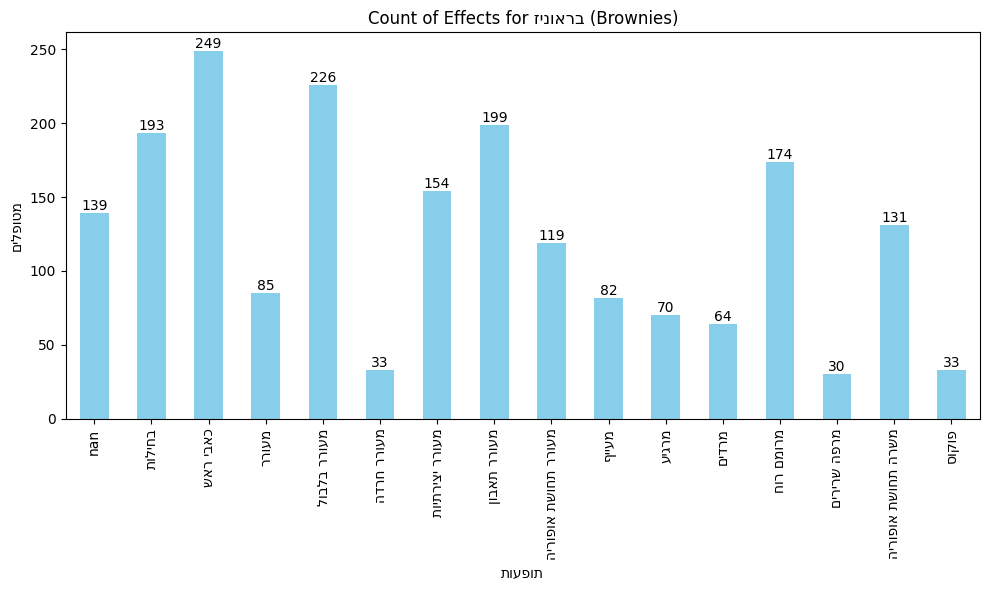

In [33]:
# Filter data for the product 'בראוניז' (Brownies)
brownie_data = effect_counts[effect_counts['product_name_count'] == 'בראוניז']
brownie_data_hist = brownie_data.drop(columns='product_name_count')

# Reversing words in effect names without '_count' suffix
effect_names = [reverse_hebrew_words(col.replace('_count', '')) for col in brownie_data_hist.columns]

# Plot histogram for the 'בראוניז' (Brownies) product
plt.figure(figsize=(10, 6))
brownie_data_hist.iloc[0].plot(kind='bar', color='skyblue')
plt.xticks(range(len(effect_names)), effect_names, rotation=90)  # Set x-axis ticks and labels
plt.title('Count of Effects for זינוארב (Brownies)')
plt.xlabel('תועפות')
plt.ylabel('םילפוטמ')

# Add counts on top of each bar
for i, count in enumerate(brownie_data_hist.iloc[0]):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Convert 'patients' to numeric binary data

In [34]:
patients_df

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2
0,4,Male,Nordia,35.421918,70,"[T20C4, T1C20, T1C28]",Schiff Barkat,[Pain],"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0
1,5,Female,Tel Aviv,29.460274,60,"[T20C4, T3C15, T1C28]",Schiff Barkat,[Pain],"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,[T20C4],Lia Eshet Har Tov,[Oncology],"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,"[T20C4, T1C20]",Oved Cohen,[Surgery],"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,[T20C4],Silvio Brill,[Pain],"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,"[T1C28, T20C4, T3C15]",Gilat Shenhav Zaltzman,[Internal medicine],"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,[T20C4],Roy Sheinfeld,[Pain],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,[T20C4],YKR,[General Medicine],סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
specific_patient = patients_df.iloc[0]
patients_df.dtypes

patient_code             int64
gender                  object
city                    object
age                    float64
license_quantity         int64
licensed_categories     object
doctors_name            object
doc._specialization     object
spasific_notes          object
flowers/oil_1           object
cat_1                   object
quentity_cat_1         float64
flowers/oil_2           object
cat_2                   object
quentity_cat_2         float64
dtype: object

In [36]:
patients_df_binary = patients_df.copy()
new_entry = {
    'patient_code': '000',
    'gender': 'Male',
    'city': 'Tel Aviv',
    'age': 35,
    'license_quantity': 70,
    'licensed_categories': ['T20C4', 'T1C20', 'T1C28'],
    'doc._specialization': ['General Medicine', 'Pain', 'Surgery'],
    'spesific_notes': np.nan,
    'flowers/oil_1': np.nan,
    'cat_1': np.nan,
    'quantity_cat_1': np.nan,
    'flowers/oil_2': np.nan,
    'cat_2': np.nan,
    'quantity_cat_2': np.nan
}

# Appending the new entry to the original dataframe
patients_df_binary = patients_df_binary.append(new_entry, ignore_index=True)
patients_df_binary

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/3550205295.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  patients_df_binary = patients_df_binary.append(new_entry, ignore_index=True)


,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2,spesific_notes,quantity_cat_1,quantity_cat_2
0,4,Male,Nordia,35.421918,70,"[T20C4, T1C20, T1C28]",Schiff Barkat,[Pain],"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0,NaN,NaN,NaN
1,5,Female,Tel Aviv,29.460274,60,"[T20C4, T3C15, T1C28]",Schiff Barkat,[Pain],"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,214,Female,Mazkeret Batya,40.698630,40,[T20C4],Lia Eshet Har Tov,[Oncology],"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,Female,Atlit,40.290411,50,"[T20C4, T1C20]",Oved Cohen,[Surgery],"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,[T20C4],Silvio Brill,[Pain],"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,79,Female,Tel Aviv,32.241096,40,"[T1C28, T20C4, T3C15]",Gilat Shenhav Zaltzman,[Internal medicine],"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,44,Female,Yehud,30.090411,50,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,32,Female,Bat Yam,28.769863,60,[T20C4],Livya Tamir,[Orthopedic surgery],סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,[T20C4],Roy Sheinfeld,[Pain],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21,Female,Ramat Gan,47.723288,50,[T20C4],YKR,[General Medicine],סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# # Splitting the lists in 'doc._specialization' column and creating dummy columns
# specializations = patients_df_binary['doc._specialization'].apply(pd.Series)

# # Getting dummy columns for each value in the lists
# specialization_dummies = pd.get_dummies(specializations.apply(pd.Series).stack()).sum(level=0)

# # Merging the dummies dataframe with the original dataframe
# patients_df_binary = pd.concat([patients_df_binary, specialization_dummies], axis=1)

# # Dropping the original 'doc._specialization' column
# patients_df_binary.drop(columns='doc._specialization', inplace=True)

In [38]:
specializations = ['Pain', 'General Medicine', 'Internal medicine', 'Oncology', 'Orthopedic surgery']

specialization_dfs = {}

for specialization in specializations:
    mask = patients_df_binary['doc._specialization'].apply(lambda x: specialization in x)
    specialization_dfs[specialization] = patients_df_binary[mask].copy()

In [39]:
specialization_dfs['Pain']

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2,spesific_notes,quantity_cat_1,quantity_cat_2
0,4,Male,Nordia,35.421918,70,"[T20C4, T1C20, T1C28]",Schiff Barkat,[Pain],"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,Flowers,T1C28,20.0,NaN,NaN,NaN
1,5,Female,Tel Aviv,29.460274,60,"[T20C4, T3C15, T1C28]",Schiff Barkat,[Pain],"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,Male,Tel Aviv,35.071233,50,[T20C4],Silvio Brill,[Pain],"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Female,Tel Aviv,27.353425,50,[T20C4],Roy Sheinfeld,[Pain],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,218,Male,Tel Aviv,44.887671,40,[T20C4],Schiff Barkat,[Pain],סובל מכאבי גב הנובעים מפריצות דיסק. מעדיף סאטי...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,000,Male,Tel Aviv,35.000000,70,"[T20C4, T1C20, T1C28]",NaN,"[General Medicine, Pain, Surgery]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
specialization_dfs['General Medicine']

,patient_code,gender,city,age,license_quantity,licensed_categories,doctors_name,doc._specialization,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,flowers/oil_2,cat_2,quentity_cat_2,spesific_notes,quantity_cat_1,quantity_cat_2
9,21,Female,Ramat Gan,47.723288,50,[T20C4],YKR,[General Medicine],סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,55,Female,Tel Aviv,65.824658,50,"[T20C4, T1C28, T3C15]",Carmel kasher,[General Medicine],סובלת מפרקינסון ונכה 100%. מחפשת הקלה על הכאב ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,000,Male,Tel Aviv,35.000000,70,"[T20C4, T1C20, T1C28]",NaN,"[General Medicine, Pain, Surgery]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
avg_ages = {}
for specialization, df in specialization_dfs.items():
    avg_ages[specialization] = df['age'].mean()

avg_ages

{'Pain': 34.532420091324205,
 'General Medicine': 49.51598173515981,
 'Internal medicine': 32.24109589041096,
 'Oncology': 40.6986301369863,
 'Orthopedic surgery': 35.4472602739726}

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/3216679073.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['age'], ax=ax, palette='Set3', width=0.15)  # Adjust the width here (default is 0.8)
/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/3216679073.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['age'], ax=ax, palette='Set3', width=0.15)  # Adjust the width here (default is 0.8)
/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/3216679073.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

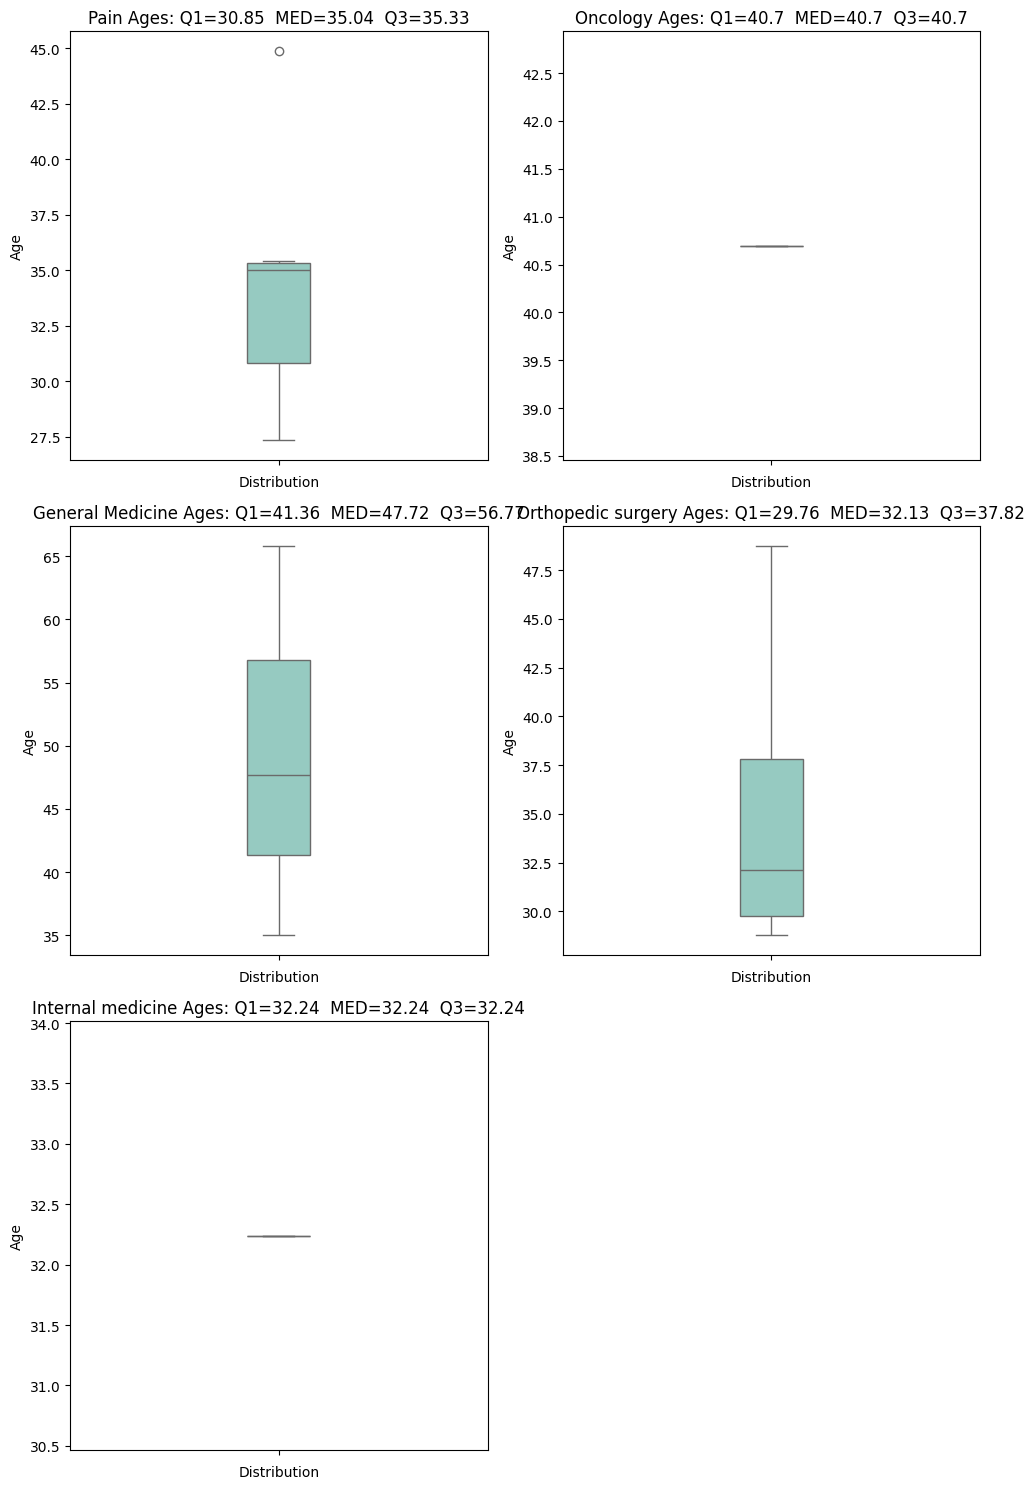

In [42]:
num_specializations = len(specialization_dfs)
num_rows = 3  # Number of rows in the subplot grid
num_cols = -(-num_specializations // num_rows)  # Calculate number of columns needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 15))

# Loop through each specialization DataFrame to create boxplots for age distribution
for i, (specialization, df) in enumerate(specialization_dfs.items()):
        # Calculate quartiles and median
    quartiles = np.percentile(df['age'], [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]
    q1_formatted = round(q1, 2)
    median_formatted = round(median, 2)
    q3_formatted = round(q3, 2)
    ax = axes[i % num_rows, i // num_rows] if num_cols > 1 else axes[i // num_rows]
    sns.boxplot(y=df['age'], ax=ax, palette='Set3', width=0.15)  # Adjust the width here (default is 0.8)

    ax.set_title(f'{specialization} Ages: Q1={q1_formatted}  MED={median_formatted}  Q3={q3_formatted}')
    ax.set_xlabel('Distribution')
    ax.set_ylabel('Age')

# Hide any empty subplots
for i in range(num_specializations, num_rows * num_cols):
    ax = axes[i % num_rows, i // num_rows] if num_cols > 1 else axes[i // num_rows]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [43]:
# Split values in 'doc._specialization' if there are multiple values and create dummy columns
specialization_dummies = patients_df_binary['doc._specialization'].str.get_dummies(sep=', ')

# Merge the dummies dataframe with the original dataframe
patients_df_binary = pd.concat([patients_df_binary, specialization_dummies], axis=1)

# Drop the original 'doc._specialization' column
patients_df_binary.drop(columns='doc._specialization', inplace=True)

#Fix column names of new binary columns
patients_df_binary.columns = [col.replace("[", "").replace("]", "").replace("'", "") for col in patients_df_binary.columns]

# Transorfm 'gender' column to 'female'
patients_df_binary.rename(columns={'gender': 'female'}, inplace=True)
patients_df_binary['female'] = patients_df_binary['female'].map({'Male': 0, 'Female': 1})

In [44]:
patients_df_binary

,patient_code,female,city,age,license_quantity,licensed_categories,doctors_name,spasific_notes,flowers/oil_1,cat_1,...,quantity_cat_2,Pain,Surgery,General Medicine,General Medicine,Internal medicine,Oncology,Orthopedic surgery,Pain,Surgery
0,4,0,Nordia,35.421918,70,"[T20C4, T1C20, T1C28]",Schiff Barkat,"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,...,NaN,0,0,0,0,0,0,0,1,0
1,5,1,Tel Aviv,29.460274,60,"[T20C4, T3C15, T1C28]",Schiff Barkat,"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,0
2,214,1,Mazkeret Batya,40.698630,40,[T20C4],Lia Eshet Har Tov,"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,0
3,39,1,Atlit,40.290411,50,"[T20C4, T1C20]",Oved Cohen,"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,1
4,22,0,Tel Aviv,35.071233,50,[T20C4],Silvio Brill,"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,0
5,79,1,Tel Aviv,32.241096,40,"[T1C28, T20C4, T3C15]",Gilat Shenhav Zaltzman,"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,...,NaN,0,0,0,0,1,0,0,0,0
6,44,1,Yehud,30.090411,50,[T20C4],Livya Tamir,סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,...,NaN,0,0,0,0,0,0,1,0,0
7,32,1,Bat Yam,28.769863,60,[T20C4],Livya Tamir,סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,...,NaN,0,0,0,0,0,0,1,0,0
8,15,1,Tel Aviv,27.353425,50,[T20C4],Roy Sheinfeld,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,0
9,21,1,Ramat Gan,47.723288,50,[T20C4],YKR,סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,...,NaN,0,0,0,1,0,0,0,0,0


In [45]:
# List of possible categories
categories_list = patients_df_binary[['patient_code','licensed_categories']]
categories_list['licensed_categories'] = categories_list['licensed_categories'].astype(str)
categories_list['licensed_categories'] = categories_list['licensed_categories'].str.replace('\'', '').str.replace(' ','').str.replace('[', '').str.replace(']', '')
unique_values = set(','.join(categories_list['licensed_categories']).split(','))
categories_list = list(set(unique_values))
categories_list

/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/2828728966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_list['licensed_categories'] = categories_list['licensed_categories'].astype(str)
/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/2828728966.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  categories_list['licensed_categories'] = categories_list['licensed_categories'].str.replace('\'', '').str.replace(' ','').str.replace('[', '').str.replace(']', '')
/var/folders/30/y2hz5bs97jd58t2m5t244nzr0000gq/T/ipykernel_19558/2828728966.py:4: Sett

['T20C4', 'T3C15', 'T1C28', 'T1C20']

In [46]:
# Iterate through each possible category and create a new column with binary encoding
for category in categories_list:
    patients_df_binary[category] = patients_df_binary['licensed_categories'].apply(lambda x: 1 if category in x else 0)

# Drop the original 'licensed_categories' column
patients_df_binary.drop(columns=['licensed_categories'], inplace=True)

patients_df_binary

,patient_code,female,city,age,license_quantity,doctors_name,spasific_notes,flowers/oil_1,cat_1,quentity_cat_1,...,General Medicine,Internal medicine,Oncology,Orthopedic surgery,Pain,Surgery,T20C4,T3C15,T1C28,T1C20
0,4,0,Nordia,35.421918,70,Schiff Barkat,"סובל מבעיה נוירולוגית, נוטה להחליף מוצרים באופ...",Flowers,T20C4,50.0,...,0,0,0,0,1,0,1,0,1,1
1,5,1,Tel Aviv,29.460274,60,Schiff Barkat,"סובלת מדלקת פרקים, משתמשת במוצרים היברידיים וא...",NaN,NaN,NaN,...,0,0,0,0,1,0,1,1,1,0
2,214,1,Mazkeret Batya,40.698630,40,Lia Eshet Har Tov,"החלימה מסרטן וסובלת מחרדות. משתמשת בJU, DQ T15...",NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
3,39,1,Atlit,40.290411,50,Oved Cohen,"סובלת מPTSD, משתמשת בעיקר במוצרים היברידיים וא...",NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,1
4,22,0,Tel Aviv,35.071233,50,Silvio Brill,"עבר תאונה, מחפש ורוכש מוצרים זולים לאור מצב כלכלי",NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
5,79,1,Tel Aviv,32.241096,40,Gilat Shenhav Zaltzman,"סובלת מדלקת פרקים,הידרדניטיס ואי ספיקה. משתמשת...",NaN,NaN,NaN,...,0,1,0,0,0,0,1,1,1,0
6,44,1,Yehud,30.090411,50,Livya Tamir,סובלת מאנדומטריוזיס ומפוסט טראומה. משתמשת בעיק...,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,0
7,32,1,Bat Yam,28.769863,60,Livya Tamir,סובלת ממחלת עצבים שמחלישה את יכולת התפקוד. משת...,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,0
8,15,1,Tel Aviv,27.353425,50,Roy Sheinfeld,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
9,21,1,Ramat Gan,47.723288,50,YKR,סובלת מפיברומיאלגיה ומ-CPTSD המלווה בחרדות.משת...,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0
